In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Sentiments_comp/train_2kmZucJ.csv")

In [ ]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [ ]:
df['label'].value_counts()

,count
label,
0,5894
1,2026


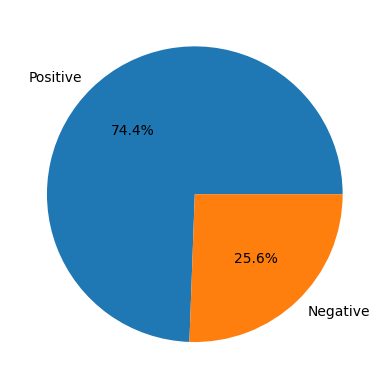

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df['label'].value_counts(), labels=['Positive', 'Negative'], autopct='%1.1f%%')
plt.show()

In [ ]:
from nltk.corpus import stopwords
import re

def clean_tweet_text():
    # Convert all the texts in lower case
    df['tweet'] = df['tweet'].str.lower()

    # Remove punctuation & Special chars
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

    print("Data cleaned!")

clean_tweet_text()

Data cleaned!


In [ ]:
df.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test httpsgooglhmfqv and...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


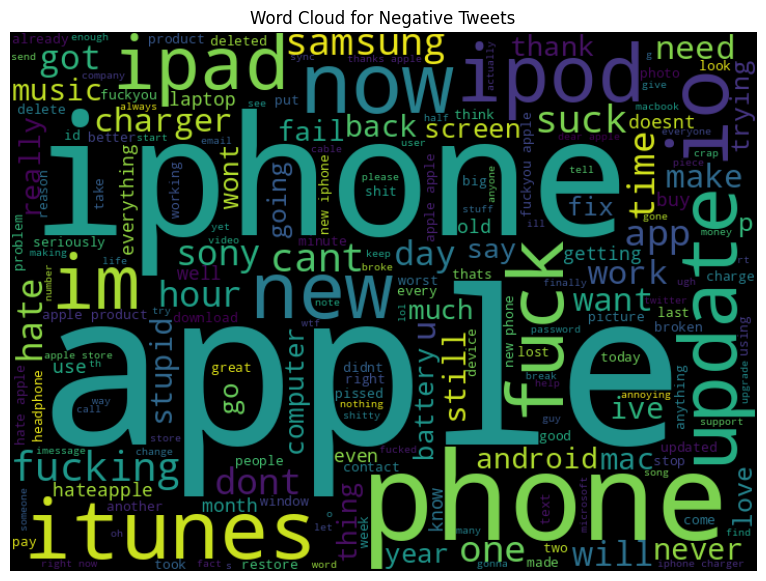

Top 20 words used in Negative Tweets:
       Word  Normalized Frequencies
0     apple              100.000000
1    iphone               54.460094
2     phone               36.150235
3       now               13.896714
4        io               13.145540
5    itunes               12.769953
6       new               11.830986
7    update               11.737089
8      ipod               11.737089
9      fuck               11.173709
10       im               10.704225
11     ipad               10.610329
12  fucking               10.234742
13     cant                9.671362
14     suck                9.201878
15  samsung                9.201878
16     time                8.920188
17      app                8.732394
18      one                8.544601
19     dont                8.169014


In [ ]:
# Analyzing top 25 words used in negative tweets

from wordcloud import WordCloud

negative_tweets = df[df['label'] == 1]
negative_tweets_text = ' '.join(negative_tweets['tweet'])

wordcloud_ = WordCloud(width=720, height=520, background_color='black').generate(negative_tweets_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Negative Tweets')
plt.show()

word_frequencies = wordcloud_.words_

# Top 20 Words used in Negative tweets
words = pd.DataFrame(word_frequencies, index=[0]).T[:20]
words.reset_index(inplace=True)
words.rename(columns={0:'Normalized Frequencies', 'index':'Word'}, inplace=True)
words['Normalized Frequencies'] = words['Normalized Frequencies'] * 100
print(f'Top 20 words used in Negative Tweets:')
print(words.head(20))

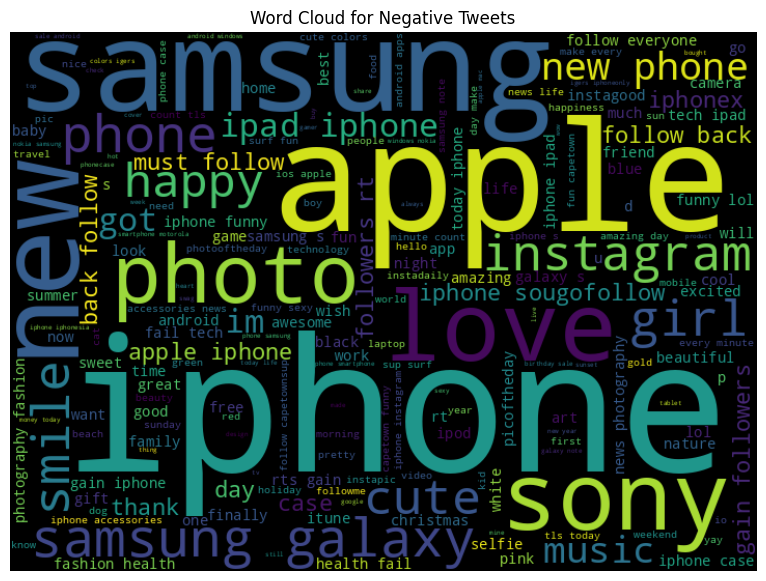

Top 20 words used in positive Tweets:
                  Word  Normalized Frequencies
0               iphone              100.000000
1                apple               65.008777
2              samsung               43.709772
3                  new               33.528379
4                 love               23.639555
5                 sony               22.527794
6                photo               16.149795
7       samsung galaxy               13.926273
8                smile               13.165594
9                phone               13.107080
10           instagram               12.638970
11                girl               12.404915
12                cute               12.112346
13               happy               11.293154
14           new phone               11.117613
15               music               10.649503
16         ipad iphone               10.239906
17                 got               10.122879
18                  im                9.888824
19  iphone sougofollow

In [ ]:
# Analyzing top 25 words used in Positive tweets

from wordcloud import WordCloud

positive_tweets = df[df['label'] == 0]
postive_tweets_text = ' '.join(positive_tweets['tweet'])

wordcloud_ = WordCloud(width=720, height=520, background_color='black').generate(postive_tweets_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Negative Tweets')
plt.show()

word_frequencies = wordcloud_.words_

# Top 20 Words used in Positive tweets
words = pd.DataFrame(word_frequencies, index=[0]).T[:20]
words.reset_index(inplace=True)
words.rename(columns={0:'Normalized Frequencies', 'index':'Word'}, inplace=True)
words['Normalized Frequencies'] = words['Normalized Frequencies'] * 100
print(f'Top 20 words used in positive Tweets:')
print(words.head(20))

In [ ]:
positive_tweets = df[df['label'] == 0]
positive_tweets['len'] = positive_tweets['tweet'].str.len()
positive_tweets['len'].describe()

/tmp/ipython-input-10-2288315392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['len'] = positive_tweets['tweet'].str.len()


,len
count,5894.000000
mean,117.632677
std,43.858054
min,5.000000
25%,98.000000
50%,107.000000
75%,115.000000
max,340.000000


In [ ]:
negative_tweets = df[df['label'] == 1]
negative_tweets['len'] = negative_tweets['tweet'].str.len()
negative_tweets['len'].describe()

/tmp/ipython-input-11-4273720323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['len'] = negative_tweets['tweet'].str.len()


,len
count,2026.000000
mean,96.993090
std,26.870755
min,41.000000
25%,78.000000
50%,97.000000
75%,114.000000
max,292.000000


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sentiments_comp/train_2kmZucJ.csv")

clean_tweet_text()

Data cleaned!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vec = TfidfVectorizer(ngram_range=(1,6),
                   min_df=3, max_df=0.9, strip_accents='unicode', use_idf=True,
                   analyzer='char',
                   stop_words='english',
                   smooth_idf=True, sublinear_tf=True,
                   max_features=50000)

X = vec.fit_transform(df['tweet'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

lr = LogisticRegression(C=1.0, solver='sag', max_iter=2500)

stf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr, X, df['label'], cv=stf, scoring='f1')

print(scores)
print(scores.mean())

[0.77974684 0.75096774 0.78848561 0.79704797 0.80102696]
0.783455022500997


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X, df['label'], cv=stf, scoring='f1')

print(scores)
print(scores.mean())

[0.78077374 0.76004872 0.78221209 0.78873239 0.81666667]
0.7856867217011757


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    random_state=42,
    learning_rate=0.01,
    n_estimators=300,
    max_depth=5)

scores = cross_val_score(xgb_model, X, df['label'], cv=stf, scoring='f1')

print(scores)
print(scores.mean())

[0.79452055 0.74021352 0.79458239 0.79908152 0.82573099]
0.7908257947009748


In [ ]:
from sklearn.svm import SVC

sv = SVC(kernel='linear', C=1.0, random_state=42)

scores = cross_val_score(sv, X, df['label'], cv=stf, scoring='f1')

print(scores)
print(scores.mean())

[0.82619048 0.78890229 0.80856124 0.81455399 0.82566586]
0.812774770981202


In [ ]:
sv.fit(X, df['label'])

SVC(kernel='linear', random_state=42)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Sentiments_comp/test_oJQbWVk.csv")

# Convert all the texts in lower case
test['tweet'] = test['tweet'].str.lower()

# Remove punctuation & Special chars
test['tweet'] = test['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

print("Data cleaned!")

Data cleaned!


In [ ]:
label = sv.predict(vec.transform(test['tweet']))

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'label': label})
submission.to_csv('submission.csv', index=False)
submission.head()

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
